In [2]:
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/GonieAhn/Data-Science-online-course-from-gonie/main/Data%20Store/example_data.csv')

In [6]:
col = []
missing = []
level = []

for name in data.columns:
    misper = data[name].isnull().sum() / data.shape[0]
    missing.append(round(misper, 4))
    
    lel = data[name].dropna()
    level.append(len(list(set(lel))))
    
    col.append(name)

In [7]:
summary = pd.concat([pd.DataFrame(col, columns=['Columns']),
                     pd.DataFrame(missing, columns=['Missing Percentage']),
                     pd.DataFrame(level, columns=['Level'])], axis=1)

In [8]:
summary

,Columns,Missing Percentage,Level
0,censor,0.0,2
1,event,0.0,358
2,age,0.0,52
3,wtkg,0.0,312
4,hemo,0.0,2
5,homo,0.0,2
6,drugs,0.0,2
7,karnof,0.0,4
8,oprior,0.0,2
9,z30,0.0,2


In [11]:
data.shape

(532, 23)

In [12]:
drop_col = summary['Columns'][(summary['Level'] <= 1) | (summary['Missing Percentage'] >= 0.8)]
data.drop(columns=drop_col, inplace=True)

In [13]:
data.shape

(532, 22)

In [14]:
summary

,Columns,Missing Percentage,Level
0,censor,0.0,2
1,event,0.0,358
2,age,0.0,52
3,wtkg,0.0,312
4,hemo,0.0,2
5,homo,0.0,2
6,drugs,0.0,2
7,karnof,0.0,4
8,oprior,0.0,2
9,z30,0.0,2


In [16]:
data.describe()

,censor,event,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,cd40,cd420,cd496,r,cd80,cd820
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,...,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,0.340226,801.236842,35.225564,76.061855,0.078947,0.640977,0.118421,95.432331,0.030075,0.546992,...,0.812030,0.580827,1.981203,0.167293,353.204887,336.139098,173.146617,0.603383,987.250000,928.214286
std,0.474231,326.887929,8.852094,13.224698,0.269910,0.480165,0.323410,5.981856,0.170955,0.498255,...,0.391056,0.493888,0.905946,0.373589,114.105253,130.961573,191.455406,0.489656,475.223907,438.569798
min,0.000000,33.000000,13.000000,47.401000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,103.000000,49.000000,-1.000000,0.000000,221.000000,150.000000
25%,0.000000,535.750000,29.000000,67.500000,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,271.000000,243.750000,-1.000000,0.000000,653.250000,626.500000
50%,0.000000,933.500000,34.000000,74.600000,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,1.000000,2.000000,0.000000,346.000000,330.500000,113.000000,1.000000,881.000000,818.000000
75%,1.000000,1081.000000,40.000000,83.502000,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,1.000000,3.000000,0.000000,422.000000,418.000000,324.000000,1.000000,1190.000000,1164.000000
max,1.000000,1231.000000,70.000000,149.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,1.000000,3.000000,1.000000,771.000000,909.000000,857.000000,1.000000,4255.000000,3130.000000


In [17]:
Y = data['censor']
X = data.drop(columns=['censor'])

In [18]:
X.head()

,event,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,...,gender,str2,strat,symptom,cd40,cd420,cd496,r,cd80,cd820
0,1090,43,66.679,0,1,0,100,0,1,1352,...,1,1,3,0,504,353,660,1,870,782
1,794,31,73.030,0,1,0,100,0,1,930,...,1,1,3,0,244,225,106,1,708,699
2,957,41,66.226,0,1,1,100,0,1,1329,...,1,1,3,0,401,366,453,1,889,720
3,188,35,78.019,0,1,0,100,0,1,964,...,1,1,3,0,221,132,-1,0,221,759
4,308,40,83.009,0,1,0,100,0,1,974,...,1,1,3,1,150,90,20,1,1730,1160


In [19]:
Y.head()

0    0
1    1
2    0
3    1
4    1
Name: censor, dtype: int64

In [21]:
scaler = MinMaxScaler().fit(X)
X_scal = scaler.transform(X)

X_scal = pd.DataFrame(X_scal, columns=X.columns)

In [22]:
X_scal.describe()

,event,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,...,gender,str2,strat,symptom,cd40,cd420,cd496,r,cd80,cd820
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,...,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,0.641266,0.389922,0.282098,0.078947,0.640977,0.118421,0.847744,0.030075,0.546992,0.150482,...,0.812030,0.580827,0.490602,0.167293,0.374558,0.333883,0.202968,0.603383,0.189948,0.261146
std,0.272861,0.155300,0.130166,0.269910,0.480165,0.323410,0.199395,0.170955,0.498255,0.186212,...,0.391056,0.493888,0.452973,0.373589,0.170816,0.152281,0.223141,0.489656,0.117805,0.147171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.419658,0.280702,0.197827,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.251497,0.226453,0.000000,0.000000,0.107152,0.159899
50%,0.751669,0.368421,0.267709,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.053033,...,1.000000,1.000000,0.500000,0.000000,0.363772,0.327326,0.132867,1.000000,0.163609,0.224161
75%,0.874791,0.473684,0.355328,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.292889,...,1.000000,1.000000,1.000000,0.000000,0.477545,0.429070,0.378788,1.000000,0.240208,0.340268
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


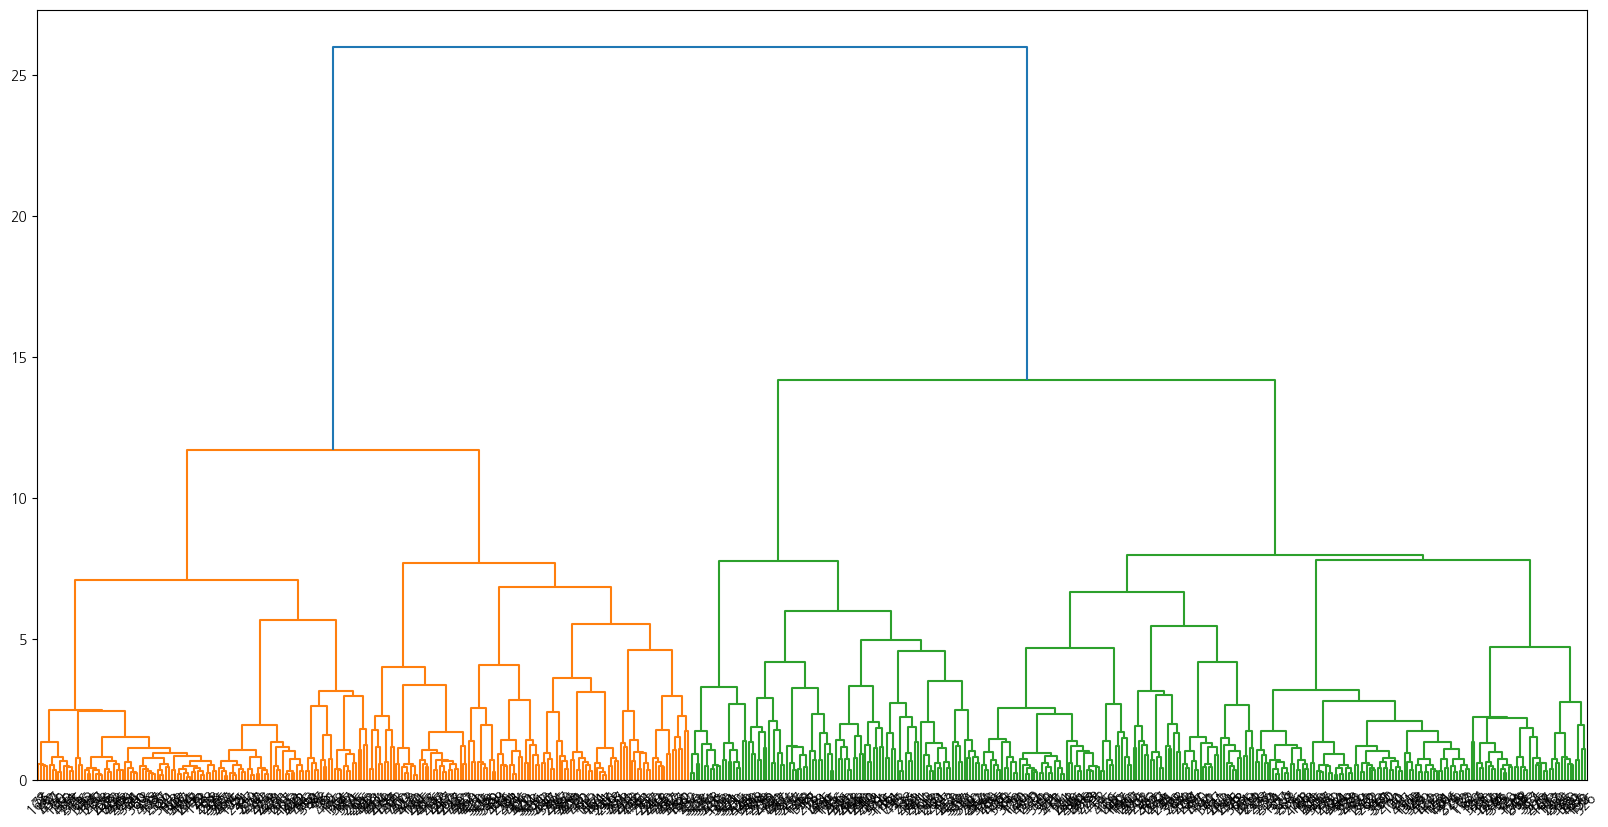

In [24]:
HC = linkage(X_scal, method='ward')
plt.figure(figsize=(20, 10))

dendrogram(HC, leaf_rotation=45, leaf_font_size=10)
plt.show()